<a href="https://colab.research.google.com/github/dot-ruth/Big-data-analytics/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
dataframe = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")
dataframe.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

Exploring the data

In [13]:
print(dataframe.head())
print(dataframe.info())
print(dataframe.describe())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

Handle missing data,assuming 'NaN' represents missing values


In [14]:
dataframe= dataframe.dropna()

# Handling Outliers
##Z-Score Calculation:

The z-score measures how many standard deviations a data point is from the mean.
For each value in a numerical column, the z-score is calculated using the zscore function from the scipy.stats module.

Typically, a z-score threshold of -3 to 3 is used to identify outliers.
Values outside this range are considered as potential outliers.

The DataFrame is then filtered to keep only the rows where the z-score falls within the specified range.
This removes data points that are considered outliers based on the z-score criterion.

In [15]:
# Import the zscore function from the scipy.stats module
from scipy.stats import zscore

# Calculate the z-score for each value in the 'value' column
dataframe['z_score'] = zscore(dataframe['popularity'])

# Keep only the rows where the z-score is within a certain range, e.g., -3 to 3
dataframe = dataframe[(dataframe['z_score'] < 3) & (dataframe['z_score'] > -3)]

<ipython-input-15-31aae60febc0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['z_score'] = zscore(dataframe['popularity'])


# Feature Engineering
Feature engineering is the process of creating new features or modifying existing ones in a dataset to enhance the performance of the data analysis. It involves selecting, transforming, or creating variables that help the model better understand the underlying patterns in the data.

In [16]:
#feature engineering
#feature 1
# converting datatype as needed and Extract relevant information from the release data like the year
dataframe["release_date"] = pd.to_datetime(dataframe["release_date"])
dataframe["release_year"] = dataframe["release_date"].dt.year

#feature 2
#Runtime binning: Group movies into categories based on their runtime to identify relationships between movie length and other variables.

#define the intervals for categorizing runtimes.
#In this case, movies are categorized into three bins: 'short' (0 to 90 minutes), 'medium' (91 to 120 minutes), and 'long' (121 minutes and above)
runtime_bins = [0, 90, 120, float('inf')]

# label for each bins
runtime_labels = ['short', 'medium', 'long']

# Create a new column 'runtime_category' based on the 'runtime' column
dataframe['runtime_category'] = pd.cut(dataframe['runtime'], bins=runtime_bins, labels=runtime_labels)

#feature 3
#Genre One-Hot Encoding:perform one-hot encoding to create binary variables for each genre.
genres = dataframe['genres'].str.get_dummies(sep='|')

# Concatenate the original DataFrame 'dataframe' with the genre dummy variables
dataframe = pd.concat([dataframe, genres], axis=1)

# Feature 4: Revenue-to-Budget Ratio
dataframe['revenue_to_budget_ratio'] = dataframe['revenue'] / dataframe['budget']

# Feature 5: Popularity and Vote Averages Interaction
dataframe['popularity_vote_avg_interaction'] = dataframe['popularity'] * dataframe['vote_average']

#cleaning the data after feature engineering
dataframe= dataframe.dropna()

# print the updated data frame
print(dataframe.head())


        id    imdb_id  popularity     budget    revenue     original_title  \
9   150540  tt2096673    6.326804  175000000  853708609         Inside Out   
10  206647  tt2379713    6.200282  245000000  880674609            Spectre   
11   76757  tt1617661    6.189369  176000003  183987723  Jupiter Ascending   
12  264660  tt0470752    6.118847   15000000   36869414         Ex Machina   
13  257344  tt2120120    5.984995   88000000  243637091             Pixels   

                                                 cast  \
9   Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...   
10  Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...   
11  Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...   
12  Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...   
13  Adam Sandler|Michelle Monaghan|Peter Dinklage|...   

                                       homepage  \
9           http://movies.disney.com/inside-out   
10  http://www.sonypictures.com/movies/spectre/   
11              http://www.jupitera

# exploratory data analysis
exploring the distribution and the relation among variables

                  id   popularity        budget       revenue      runtime  \
count    1573.000000  1573.000000  1.573000e+03  1.573000e+03  1573.000000   
mean    58635.152575     1.351528  4.125482e+07  1.297060e+08   108.555626   
std     80376.866991     1.241182  5.157196e+07  2.037236e+08    27.282874   
min        12.000000     0.005391  0.000000e+00  0.000000e+00    10.000000   
25%      8321.000000     0.505291  5.060730e+06  5.480996e+06    95.000000   
50%     23128.000000     0.939705  2.300000e+07  4.983061e+07   105.000000   
75%     69668.000000     1.755117  5.800000e+07  1.584683e+08   118.000000   
max    414419.000000     6.887883  4.250000e+08  1.845034e+09   705.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  \
count  1573.000000   1573.000000   1573.000000  1.573000e+03  1.573000e+03   
mean    702.885569      6.209282   2008.281627  4.347066e+07  1.475233e+08   
std     990.856512      0.829622      8.913003  5.231890e+07  2

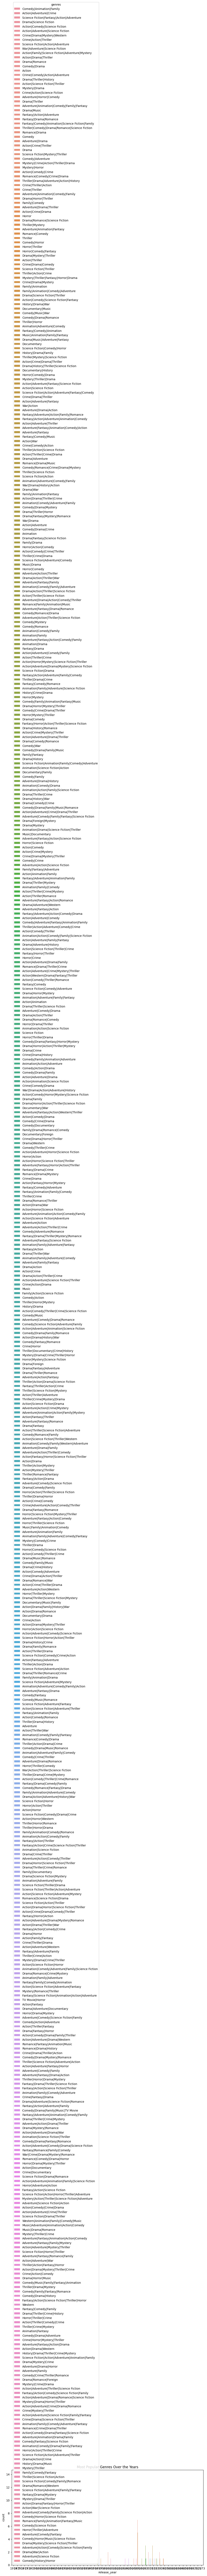

In [17]:
#exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
print(dataframe.describe())

# Visualizations
# Most Popular Genres Over the Years
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', hue='genres', data=dataframe)
plt.title('Most Popular Genres Over the Years')
plt.show()

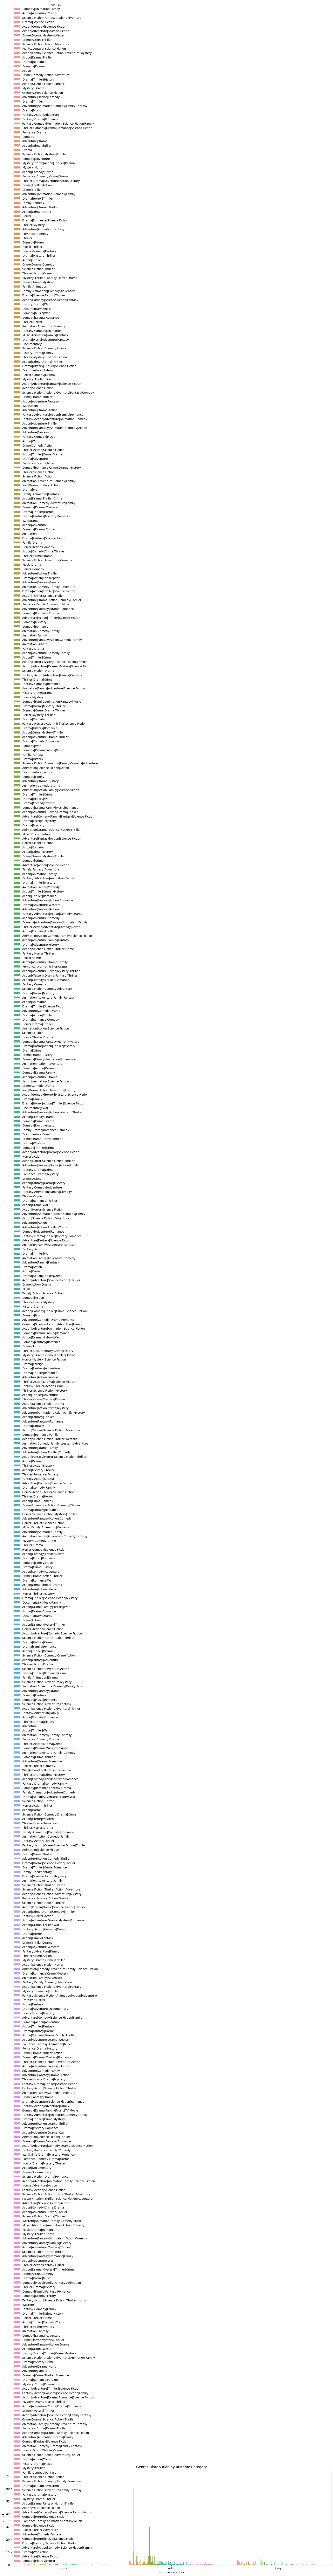

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


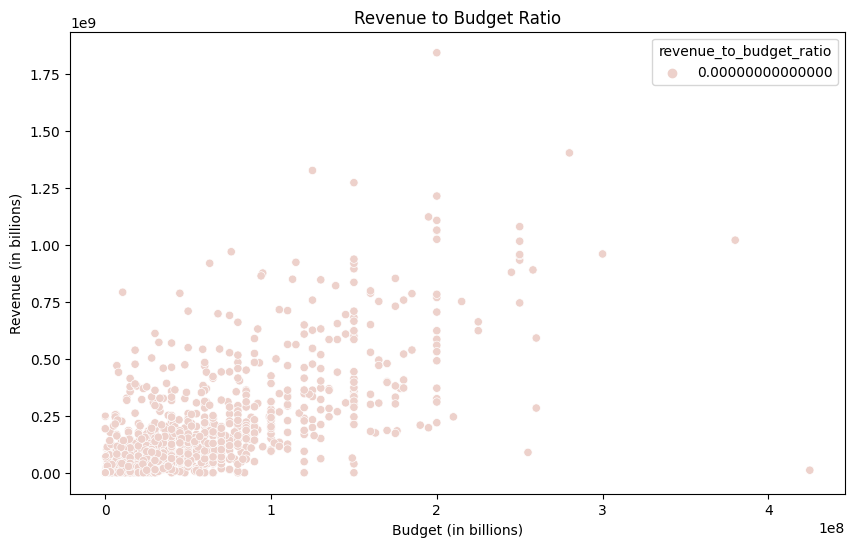

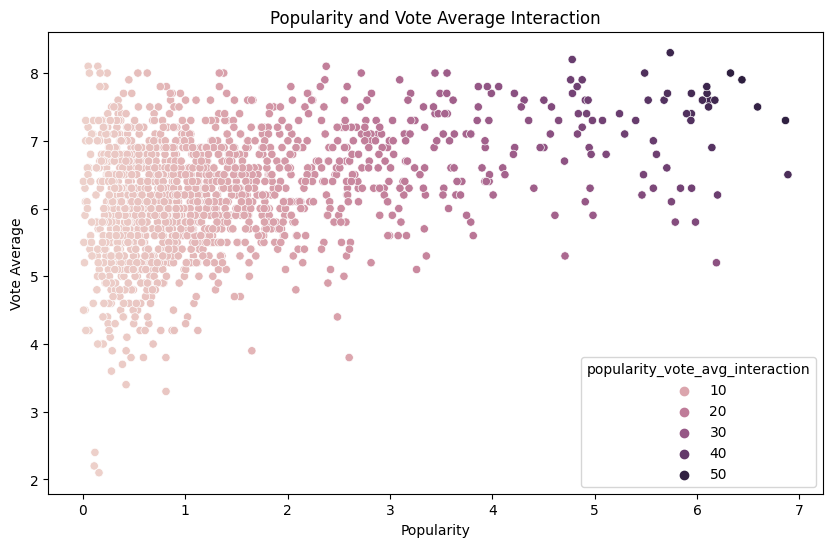

In [20]:
# Runtime Binning
plt.figure(figsize=(20, 6))
sns.countplot(x='runtime_category', hue='genres', data=dataframe)
plt.title('Genres Distribution by Runtime Category')
plt.show()

# Revenue to Budget Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', hue='revenue_to_budget_ratio', data=dataframe)
plt.title('Revenue to Budget Ratio')
plt.xlabel('Budget (in billions)')
plt.ylabel('Revenue (in billions)')
plt.show()

# Popularity and Vote Average Interaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_average', hue='popularity_vote_avg_interaction', data=dataframe)
plt.title('Popularity and Vote Average Interaction')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

# Draw Conclusion
So based on the analysis lets see if we can adress the questions posed on the first phase

In [21]:
# what are the most popular genre for each year
popular_genres = dataframe.groupby('release_year')['genres'].value_counts().groupby('release_year').idxmax().reset_index()
print(popular_genres)


    release_year                                             genres
0           1974                  (1974, Adventure|Action|Thriller)
1           1975                   (1975, Adventure|Comedy|Fantasy)
2           1976                               (1976, Action|Crime)
3           1977                  (1977, Adventure|Action|Thriller)
4           1978                              (1978, Action|Comedy)
5           1979  (1979, Action|Adventure|Thriller|Science Fiction)
6           1980           (1980, Adventure|Action|Science Fiction)
7           1981                           (1981, Adventure|Action)
8           1982    (1982, Horror|Science Fiction|Mystery|Thriller)
9           1983                  (1983, Adventure|Action|Thriller)
10          1984  (1984, Action|Adventure|Drama|Romance|Science ...
11          1985                      (1985, Action|Crime|Thriller)
12          1986            (1986, Adventure|Fantasy|Action|Comedy)
13          1987                  (1987, Action|